## Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_GAS_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,63195.555027,63540.885929,62919.290305,62919.290305,NaN,NaN,398200
2021-03-16,62919.290305,63195.555027,61952.363780,62366.760863,NaN,NaN,893400
2021-03-17,62435.827043,65612.871339,61883.297600,64093.415371,NaN,NaN,798700
2021-03-18,64162.481552,64231.547732,63195.555027,63402.753568,NaN,NaN,276400
2021-03-19,62504.893223,62781.157945,61952.363780,62781.157945,NaN,NaN,1016800


In [3]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_GAS_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,4.044159e+12,2.044102e+12,14.719315,872.551359,-0.2640,0.1669,0.3301,4.029686,0.287139,25717.538883
Q3/2024,4.183418e+12,2.521794e+12,16.512338,1076.460343,0.0400,0.1850,0.5397,2.852770,0.270042,24864.072599
Q2/2024,5.735665e+12,3.320817e+12,16.552417,1417.533257,0.0317,0.1610,0.3419,3.925063,0.321510,29693.095726
Q1/2024,3.691115e+12,2.511656e+12,15.178311,1093.574594,-0.3753,0.1649,0.3516,3.843911,0.259733,29005.396634
Q4/2023,4.058279e+12,2.723017e+12,14.897607,1185.601097,-0.3018,0.1863,0.3439,3.907869,0.261851,27886.802632


In [4]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [5]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,67835.000000,2024-12-31
Q3/2024,73114.285714,2024-09-30
Q2/2024,70772.961818,2024-06-30
Q1/2024,73211.839762,2024-03-31
Q4/2023,68999.363031,2023-12-31


In [6]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,3.269465e+12,2.029678e+12,21.879261,1060.465307,-0.1300,0.1475,0.3306,4.025066,0.266794,26378.588957,61945.786049,NaN,NaN
Q2/2021,3.782209e+12,2.261954e+12,21.947548,1181.825132,0.2757,0.1600,0.5639,2.773287,0.316503,24433.169539,65398.679632,3452.893583,0.055741
Q3/2021,3.407331e+12,2.417436e+12,21.539195,1263.061013,0.1948,0.1736,0.4587,3.179932,0.250504,25683.642678,71606.846447,6208.166814,0.094928
Q4/2021,3.526651e+12,1.963898e+12,24.177097,1026.096633,0.1674,0.1742,0.5092,2.963953,0.265512,26695.711681,71314.902491,-291.943956,-0.004077
Q1/2022,5.136478e+12,3.428679e+12,24.341005,1791.415040,0.6893,0.1918,0.5288,2.890962,0.325600,28504.665895,79216.218926,7901.316436,0.110795


## Phân tích dữ liệu

In [7]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,3.269465e+12,2.029678e+12,21.879261,1060.465307,-0.1300,0.1475,0.3306,4.025066,0.266794,26378.588957,61945.786049,NaN,NaN
Q2/2021,3.782209e+12,2.261954e+12,21.947548,1181.825132,0.2757,0.1600,0.5639,2.773287,0.316503,24433.169539,65398.679632,3452.893583,0.055741
Q3/2021,3.407331e+12,2.417436e+12,21.539195,1263.061013,0.1948,0.1736,0.4587,3.179932,0.250504,25683.642678,71606.846447,6208.166814,0.094928
Q4/2021,3.526651e+12,1.963898e+12,24.177097,1026.096633,0.1674,0.1742,0.5092,2.963953,0.265512,26695.711681,71314.902491,-291.943956,-0.004077
Q1/2022,5.136478e+12,3.428679e+12,24.341005,1791.415040,0.6893,0.1918,0.5288,2.890962,0.325600,28504.665895,79216.218926,7901.316436,0.110795


### Thống kê mô tả

In [8]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |         gross_profit |           net_income |    pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|---------------------:|---------------------:|------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |                16.00 |                16.00 | 16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  | 4,367,466,908,167.25 | 2,841,988,219,328.25 | 17.84 | 1,379.15 |         0.10 |  0.20 |       0.41 |            3.56 |             0.28 |    28,081.34 |   72,663.33 |         392.61 |         0.01 |
| std   |   957,642,389,642.03 |   782,968,336,418.04 |  3.94 |   443.56 |         0.46 |  0.04 |       0.09 |            0.54 |             0.03 |     2,465.81 |  

In [9]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                           Variance |
|:---------------|-----------------------------------:|
| gross_profit   | 917,078,946,439,296,752,549,888.00 |
| net_income     | 613,039,415,833,238,769,238,016.00 |
| pe             |                              15.53 |
| eps            |                         196,747.12 |
| eps_growth     |                               0.21 |
| roe            |                               0.00 |
| de_ratio       |                               0.01 |
| current_ratio  |                               0.29 |
| asset_turnover |                               0.00 |
| book_value     |                       6,080,219.21 |
| close_avg      |                      27,778,276.58 |
| price_change   |                      30,382,234.20 |
| pct_change     |                               0.01 |


### Vẽ biểu đồ biến động 

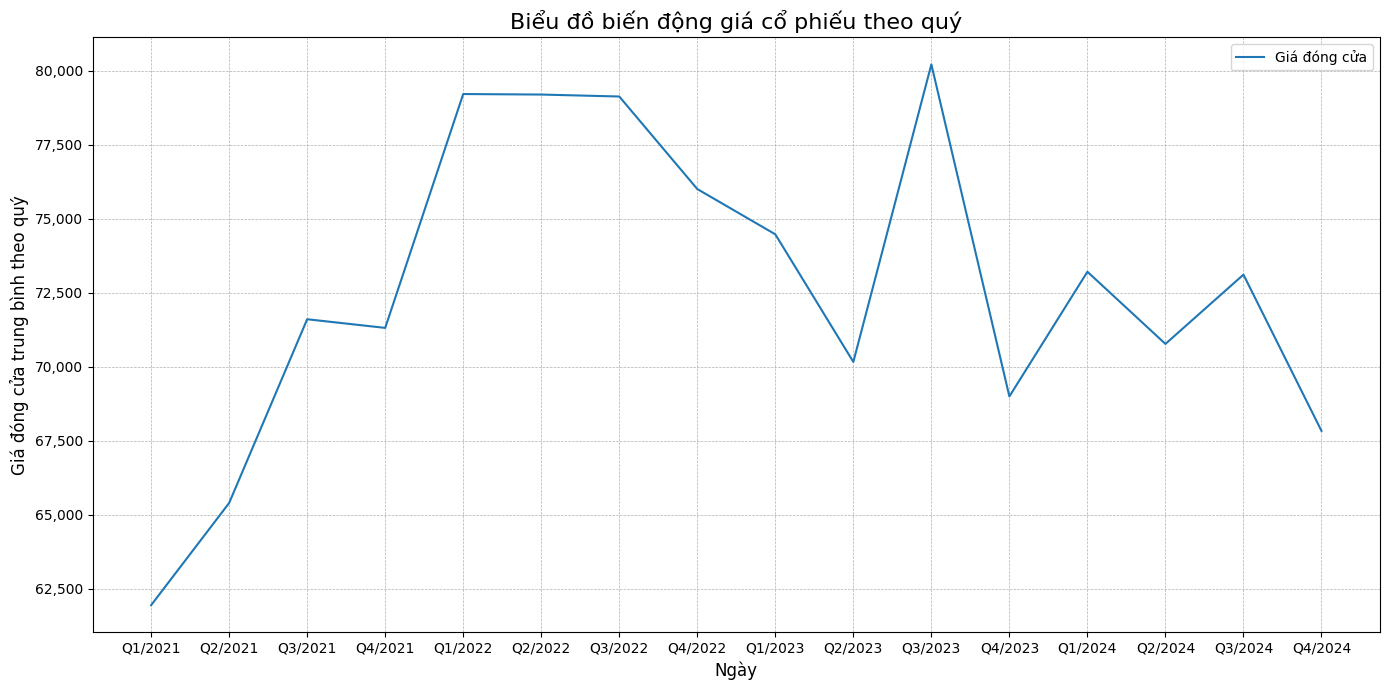

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

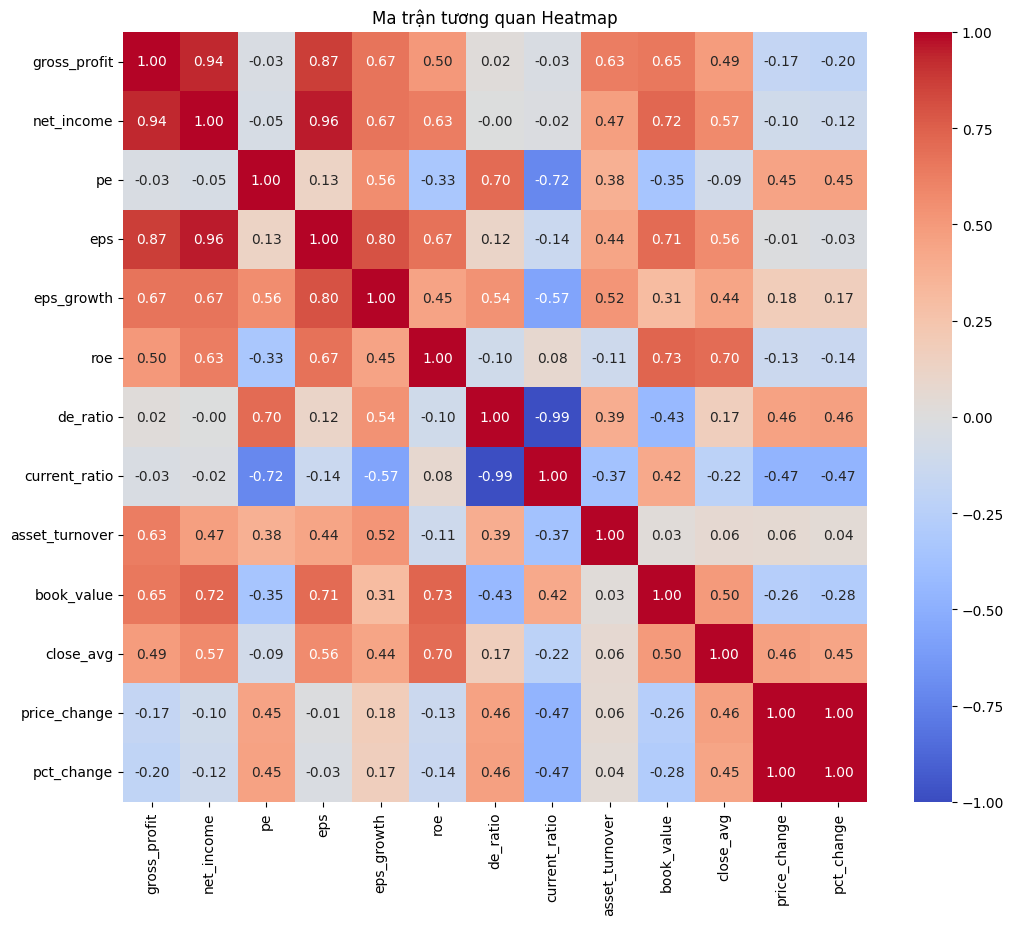

In [11]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [12]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
roe               0.700013
net_income        0.570678
eps               0.563581
book_value        0.498020
gross_profit      0.490026
price_change      0.463213
pct_change        0.445137
eps_growth        0.443767
de_ratio          0.170539
asset_turnover    0.062944
pe               -0.092579
current_ratio    -0.219429
Name: close_avg, dtype: float64

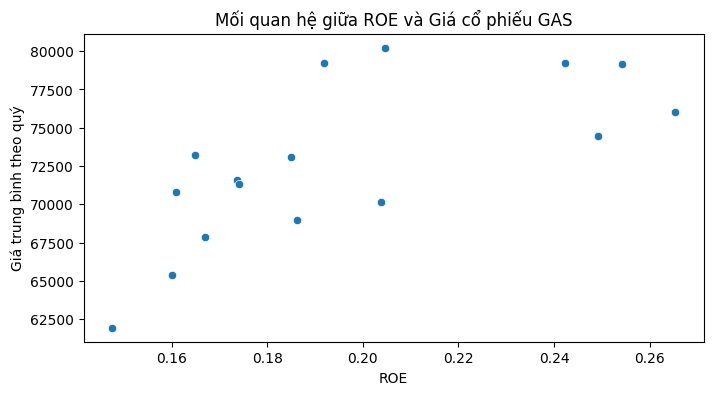

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu GAS')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()